# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
#define class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

In [14]:
# show mapping of class names
import pandas as pd
pd.DataFrame({"Label": range(10), "Class Name": class_names})

,Label,Class Name
0,0,airplane
1,1,automobile
2,2,bird
3,3,cat
4,4,deer
5,5,dog
6,6,frog
7,7,horse
8,8,ship
9,9,truck


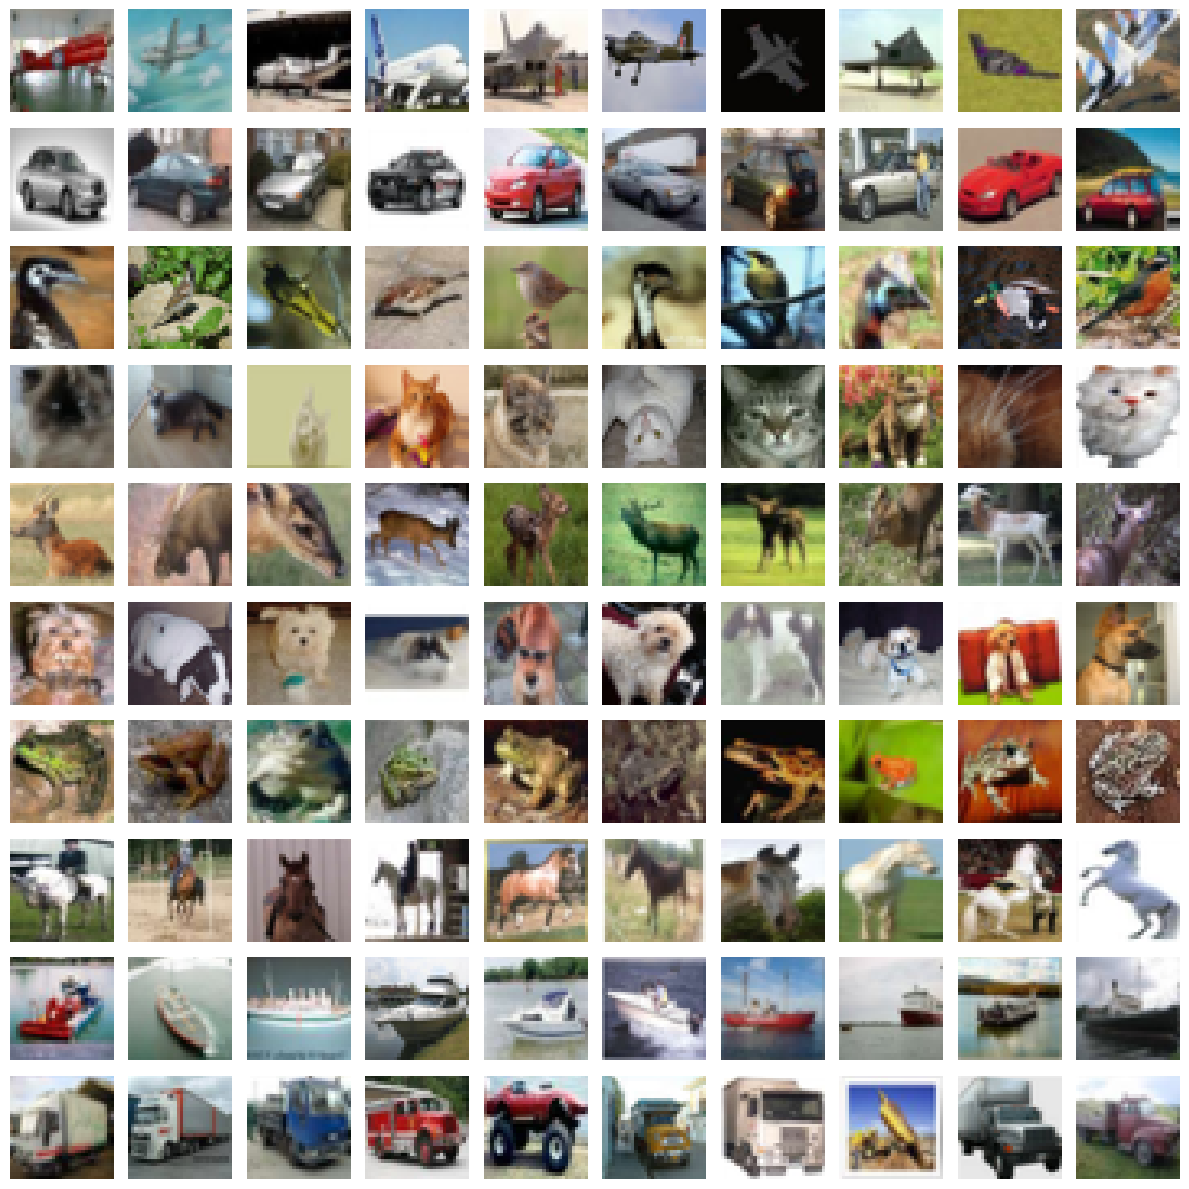

In [15]:
# show 10 random images per class
plt.figure(figsize=(12,12))
# for each class pick 10 random images, show label name on first image in each row
for i in range(10):
    idxs = np.where(y_train.flatten() == i)[0]
    samples = np.random.choice(idxs, 10, replace=False)

    for j, idx in enumerate(samples):
        plt.subplot(10,10,i*10 + j + 1)
        plt.imshow(x_train[idx])
        plt.axis("off")
        if j == 0:
            plt.ylabel(class_names[i], fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
# Convert the labels to one-hot encoded form.

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test,  num_classes=10)

print("Before one-hot:", y_train[0])
print("After one-hot:", y_train_cat[0])


Before one-hot: [6]
After one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [18]:
# Normalize the images.
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("Train shape:", x_train.shape)

print("Pixel range:", x_train.min(), "to", x_train.max())


Train shape: (50000, 32, 32, 3)
Pixel range: 0.0 to 1.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [19]:
from keras.backend import clear_session
clear_session()

In [20]:
# importing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Step 1: Convolutional layer
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))

# Step 2: Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Step 3: Flatten
model.add(Flatten())

# Step 4: Dense hidden layer
model.add(Dense(100, activation="relu"))

# Step 5: Output layer (10 classes in CIFAR-10)
model.add(Dense(10, activation="softmax"))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [30]:
# compile model (categorical_crossentropy, SGD optimizer, accuracy as the metric)
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=512, validation_data=(x_test, y_test_cat))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.7843 - loss: 0.6270 - val_accuracy: 0.6456 - val_loss: 1.1399
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7826 - loss: 0.6352 - val_accuracy: 0.6390 - val_loss: 1.1475
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7819 - loss: 0.6400 - val_accuracy: 0.6354 - val_loss: 1.1753
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7800 - loss: 0.6444 - val_accuracy: 0.6223 - val_loss: 1.2272
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7796 - loss: 0.6335 - val_accuracy: 0.6367 - val_loss: 1.1538
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7795 - loss: 0.6376 - val_accuracy: 0.6405 - val_loss: 1.1512
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7841 - loss: 0.6356 - val_accuracy: 0.6440 - val_loss: 1.1301
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7815 - loss: 0.6348 - val_accuracy: 0.6436 - v

In [31]:
# fit the model for 50 epochs with a batch size of 512
history = model.fit(
x_train, y_train_cat,
epochs=50,
batch_size=512,
validation_data=(x_test, y_test_cat),
verbose=1)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7854 - loss: 0.6305 - val_accuracy: 0.6348 - val_loss: 1.1985
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7852 - loss: 0.6269 - val_accuracy: 0.6393 - val_loss: 1.1728
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7890 - loss: 0.6126 - val_accuracy: 0.6435 - val_loss: 1.1375
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7883 - loss: 0.6133 - val_accuracy: 0.6441 - val_loss: 1.1395
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7909 - loss: 0.6112 - val_accuracy: 0.6494 - val_loss: 1.1303
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7860 - loss: 0.6228 - val_accuracy: 0.6416 - val_loss: 1.1500
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7863 - loss: 0.6214 - val_accuracy: 0.6474 - val_loss: 1.1282
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7921 - loss: 0.6088 - val_accuracy: 0.6447 - v

*   Plot the cross entropy loss curve and the accuracy curve

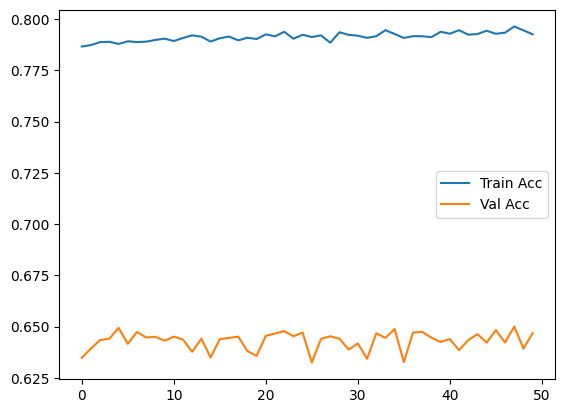

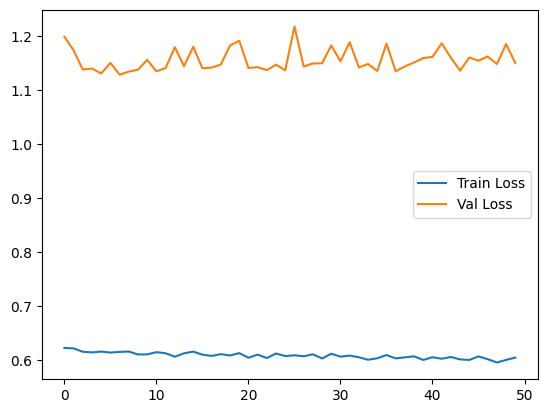

In [32]:
# plot cross entropy loss curve
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [33]:
from keras.backend import clear_session
clear_session()

In [35]:
#Define a deeper model architecture for CIFAR-10 dataset.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

#Stack two convolutional layers with 32 filters, each of 3 x 3.
model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [36]:
#compile model
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.1686 - loss: 2.2616 - val_accuracy: 0.2815 - val_loss: 2.0943
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2713 - loss: 2.0591 - val_accuracy: 0.3196 - val_loss: 1.9503
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3051 - loss: 1.9648 - val_accuracy: 0.3090 - val_loss: 1.9535
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3333 - loss: 1.9045 - val_accuracy: 0.3534 - val_loss: 1.8350
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3572 - loss: 1.8369 - val_accuracy: 0.3623 - val_loss: 1.8311
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3731 - loss: 1.7954 - val_accuracy: 0.3755 - val_loss: 1.7848
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3776 - loss: 1.7657 - val_accuracy: 0.3867 - val_loss: 1.7425
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3908 - loss: 1.7412 - val_accuracy: 0.3983 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


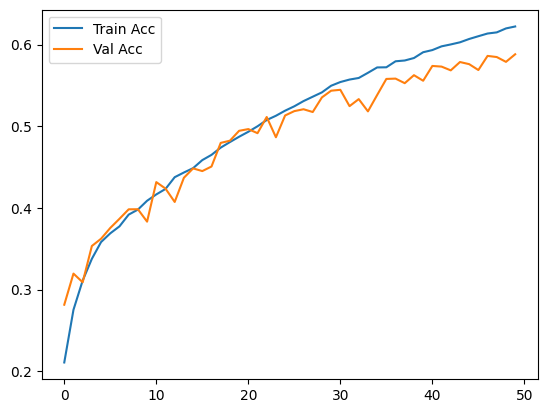

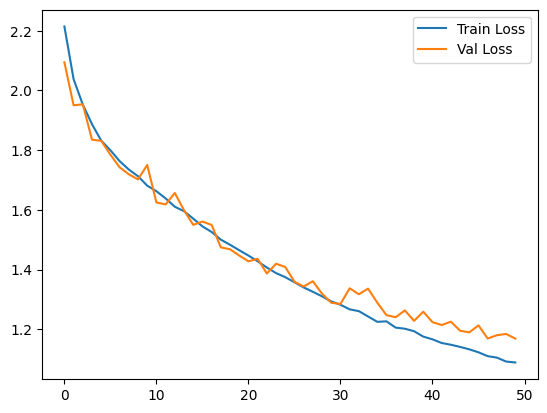

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

**Comment on the observation**

#no overfitting anymore

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [38]:
# Predict probabilities on test set
y_pred_probs = model.predict(x_test)

# Convert to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# True labels (from one-hot back to integers)
y_true = np.argmax(y_test_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


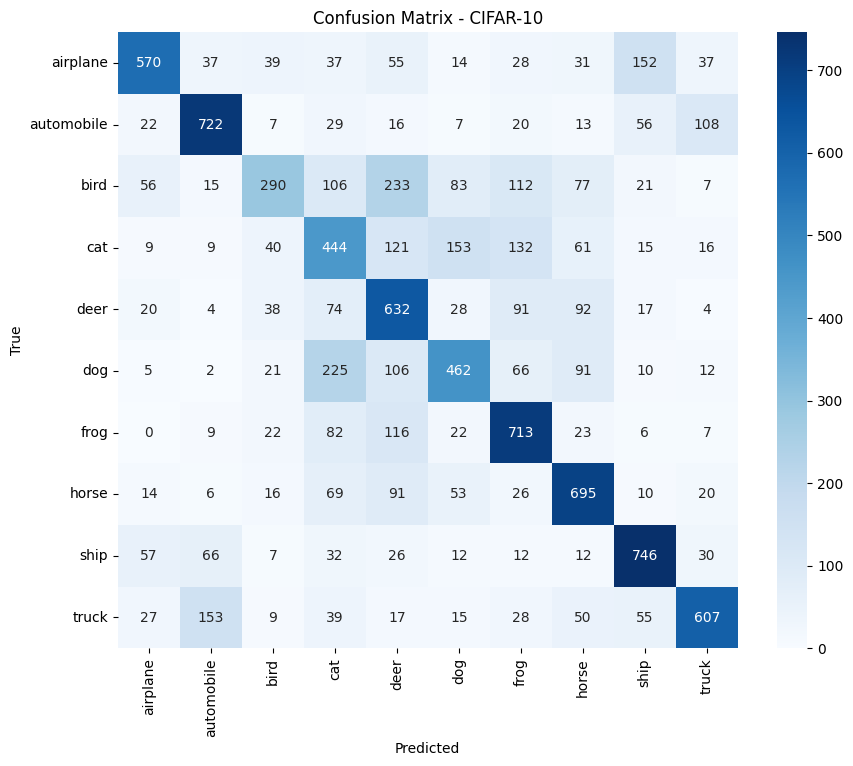

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CIFAR-10")
plt.show()


**Comment here :**
# hard to detect:
#bird and deer, dog and cat, truck and automobile, airplane and ship

In [41]:
# print test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

Test accuracy: 0.588
Test loss: 1.169


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [42]:
from keras.backend import clear_session
clear_session()

In [43]:
#Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(256, (3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [44]:
#compile model
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=512,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 257ms/step - accuracy: 0.1026 - loss: 2.3006 - val_accuracy: 0.1168 - val_loss: 2.2944
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.1216 - loss: 2.2915 - val_accuracy: 0.1194 - val_loss: 2.2785
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.1326 - loss: 2.2696 - val_accuracy: 0.1932 - val_loss: 2.2238
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2042 - loss: 2.1912 - val_accuracy: 0.2471 - val_loss: 2.0974
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2376 - loss: 2.1011 - val_accuracy: 0.2782 - val_loss: 1.9911
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.2651 - loss: 2.0186 - val_accuracy: 0.2513 - val_loss: 2.0564
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.2783 - loss: 1.9804 - val_accuracy: 0.3183 - val_loss: 1.9218
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.3103 - loss: 1.9274 - val_accu

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity → this lets the network learn complex patterns (e.g., edges in images)
_

2 - Key Differences between sigmoid and softmax:

Sigmoid → good for binary classification (1 neuron output).

Softmax → good for multiclass classification (many classes, e.g. CIFAR-10 with 10 classes).

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy → good for multiclass classification.

Binary Crossentropy → good for binary classification.
_
